# Exploration of traffic data from lauttasaaren silta

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First download the dataset and place it in the data/ folder:
https://www.avoindata.fi/data/fi/dataset/liikennemaarat-helsingissa

The data is obtained from an automatic meassurement point at: https://www.google.fi/maps/place/60%C2%B009'44.6%22N+24%C2%B053'58.6%22E/@60.1623877,24.8974263,17z/data=!3m1!4b1!4m5!3m4!1s0x0:0x0!8m2!3d60.162385!4d24.899615?hl=en

Legend(in Finnish): ha=henkilöautot pa=pakettiautot ka=kuorma-autot ra=rekka-autot la=linja-autot mp=moottoripyörät rv=raitiovaunut

Laskenta on tehty tunneittain, paitsi ruuhka-aikoina (klo 6.00-9.00 ja 15.00-18.00) jaksotus on 15 minuuttia. Kellonajat ovat alkavia kellonaikoja. Laskentapisteiden poikkileikkaukset lasketaan suunnittain (suunta 1 on keskustaan, linjalla D D1-D13 länteen)

In [2]:
data = pd.read_csv('data/hki_liikennemaarat.csv', encoding='latin-1',delimiter=';')
data.head()

,piste,nimi,x_gk25,y_gk25,suunta,aika,vuosi,ha,pa,ka,ra,la,mp,rv,autot
0,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,0,2011,76,5,1,0,5,0,0,87
1,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,100,2011,65,5,1,0,4,0,0,75
2,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,200,2011,61,4,1,0,4,0,0,70
3,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,300,2011,52,4,1,0,3,0,0,60
4,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,400,2011,31,2,0,0,2,0,0,35



The columns are: ha=henkilöautot pa=pakettiautot ka=kuorma-autot ra=rekka-autot la=linja-autot mp=moottoripyörät rv=raitiovaunut

Remove data about trams and other measurement points.

In [3]:
laru = data[data.nimi == 'LAUTTASAAREN SILTA']
laru = laru.loc[:,['suunta','aika','vuosi','autot','ha','pa','ka','ra','la','mp']]

Since the time series is at uneven intervals some reductions have to be made.

In [4]:
laru['tunti'] = (laru['aika'] / 100).apply(np.floor)
laru

,suunta,aika,vuosi,autot,ha,pa,ka,ra,la,mp,tunti
0,1.0,0,2011,87,76,5,1,0,5,0,0.0
1,1.0,100,2011,75,65,5,1,0,4,0,1.0
2,1.0,200,2011,70,61,4,1,0,4,0,2.0
3,1.0,300,2011,60,52,4,1,0,3,0,3.0
4,1.0,400,2011,35,31,2,0,0,2,0,4.0
5,1.0,500,2011,87,76,5,1,0,5,0,5.0
6,1.0,600,2011,54,42,4,1,0,7,0,6.0
7,1.0,615,2011,60,45,4,3,0,8,0,6.0
8,1.0,630,2011,77,60,6,2,0,9,1,6.0
9,1.0,645,2011,96,77,6,3,0,10,1,6.0


Lets define light as: ha=henkilöautot pa=pakettiautot mp=moottoripyörät
Heavy as: ka=kuorma-autot ra=rekka-autot 
Buses as: la=linja-autot

In [5]:
laru['light traffic'] = laru['ha'] + laru['pa'] + laru['mp']
laru['heavy traffic'] = laru['ka'] + laru['ra'] + laru['la']
laru['buses'] = laru['la']

In [6]:
laru.head()

,suunta,aika,vuosi,autot,ha,pa,ka,ra,la,mp,tunti,light traffic,heavy traffic,buses
0,1.0,0,2011,87,76,5,1,0,5,0,0.0,81,6,5
1,1.0,100,2011,75,65,5,1,0,4,0,1.0,70,5,4
2,1.0,200,2011,70,61,4,1,0,4,0,2.0,65,5,4
3,1.0,300,2011,60,52,4,1,0,3,0,3.0,56,4,3
4,1.0,400,2011,35,31,2,0,0,2,0,4.0,33,2,2


In [7]:
laru = laru.drop(['autot','ha','pa','ka','ra','la','mp'],axis=1)
laru.head()

,suunta,aika,vuosi,tunti,light traffic,heavy traffic,buses
0,1.0,0,2011,0.0,81,6,5
1,1.0,100,2011,1.0,70,5,4
2,1.0,200,2011,2.0,65,5,4
3,1.0,300,2011,3.0,56,4,3
4,1.0,400,2011,4.0,33,2,2


In [8]:
yrl = laru.groupby(['vuosi','suunta','tunti']).sum()
yrl.reset_index(inplace=True)
yrl

,vuosi,suunta,tunti,aika,light traffic,heavy traffic,buses
0,2011,1.0,0.0,0,81,6,5
1,2011,1.0,1.0,100,70,5,4
2,2011,1.0,2.0,200,65,5,4
3,2011,1.0,3.0,300,56,4,3
4,2011,1.0,4.0,400,33,2,2
5,2011,1.0,5.0,500,81,6,5
6,2011,1.0,6.0,2490,246,43,34
7,2011,1.0,7.0,2890,363,52,42
8,2011,1.0,8.0,3290,427,60,45
9,2011,1.0,9.0,900,379,49,37


In [9]:
y_2016_tohel = yrl[(yrl.vuosi == 2016) & (yrl.suunta == 1.0) ]
y_2016_tolaru = yrl[(yrl.vuosi == 2016) & (yrl.suunta == 2.0) ]
y_2016_tohel = y_2016_tohel.drop(['aika','suunta','vuosi'],axis = 1)
y_2016_tolaru = y_2016_tolaru.drop(['aika','suunta','vuosi'],axis = 1)

In [10]:
y_2016_tohel.head()

,tunti,light traffic,heavy traffic,buses
240,0.0,33,2,2
241,1.0,24,1,1
242,2.0,11,1,1
243,3.0,22,1,1
244,4.0,23,1,1


In [11]:
y_2016_tolaru.head()

,tunti,light traffic,heavy traffic,buses
264,0.0,46,3,3
265,1.0,35,3,2
266,2.0,20,1,1
267,3.0,12,1,1
268,4.0,21,1,1


In [12]:
y_2016_tohel['time'] = y_2016_tohel['tunti'].apply(lambda x: pd.to_timedelta(x, unit='h'))
y_2016_tolaru['time'] = y_2016_tolaru['tunti'].apply(lambda x: pd.to_timedelta(x, unit='h'))
y_2016_tolaru = y_2016_tolaru.set_index('time')
y_2016_tohel = y_2016_tohel.set_index('time')
y_2016_tohel

,tunti,light traffic,heavy traffic,buses
time,,,,
00:00:00,0.0,33,2,2
01:00:00,1.0,24,1,1
02:00:00,2.0,11,1,1
03:00:00,3.0,22,1,1
04:00:00,4.0,23,1,1
05:00:00,5.0,64,5,4
06:00:00,6.0,179,35,27
07:00:00,7.0,515,57,40
08:00:00,8.0,824,56,37


In [13]:
y_2016_tohel = y_2016_tohel.drop(['tunti'], axis = 1)
y_2016_tolaru = y_2016_tolaru.drop(['tunti'], axis = 1)
y_2016_tolaru

,light traffic,heavy traffic,buses
time,,,
00:00:00,46,3,3
01:00:00,35,3,2
02:00:00,20,1,1
03:00:00,12,1,1
04:00:00,21,1,1
05:00:00,35,3,2
06:00:00,117,47,40
07:00:00,284,39,27
08:00:00,395,49,35


In [14]:
xinterval = pd.date_range('1/1/2011', periods=24, freq='H').time

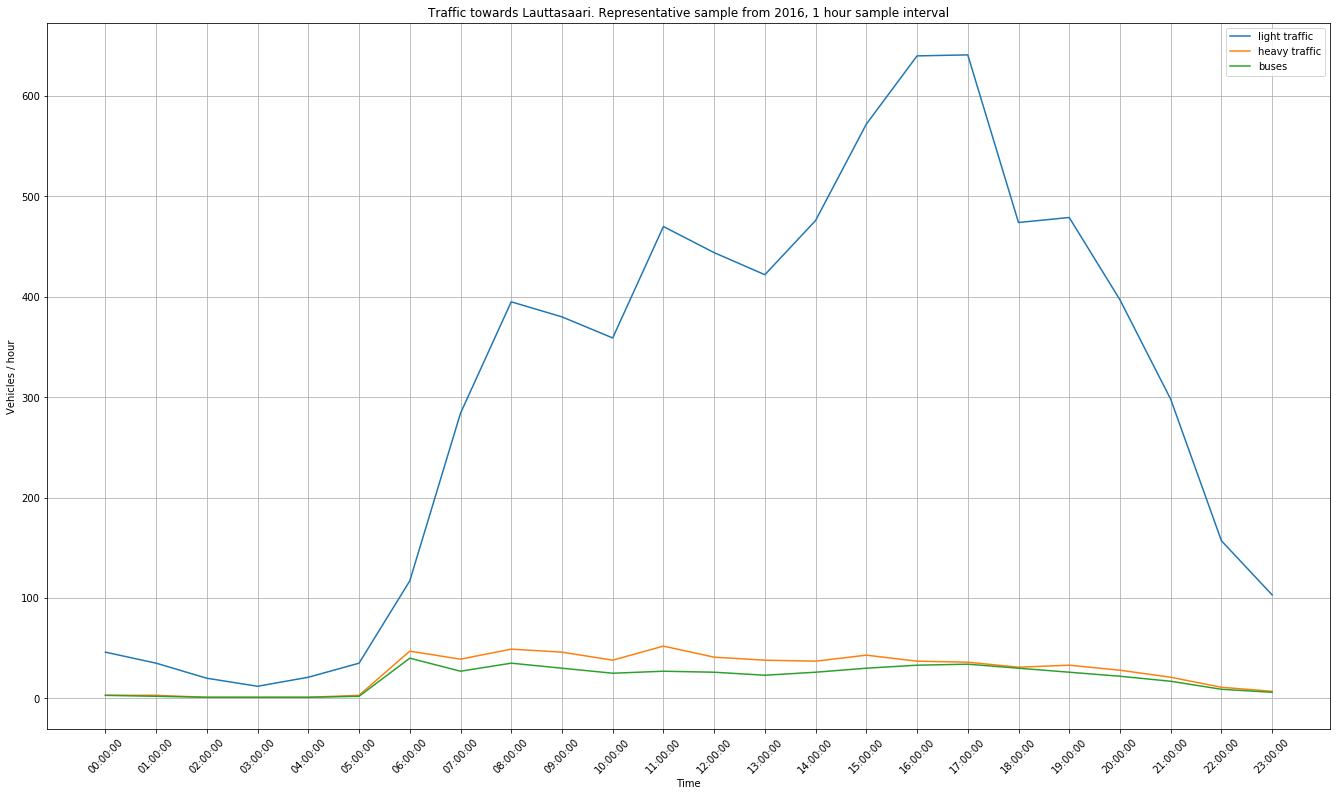

In [15]:
plt.figure(figsize=(23,13))
plt.xticks(xinterval,rotation=45)
plt.grid(True)
plt.title('Traffic towards Lauttasaari. Representative sample from 2016, 1 hour sample interval')
plt.plot(xinterval,y_2016_tolaru['light traffic']);
plt.plot(xinterval,y_2016_tolaru['heavy traffic']);
plt.plot(xinterval,y_2016_tolaru['buses']);
plt.legend(['light traffic','heavy traffic','buses']);
plt.xlabel('Time');
plt.ylabel('Vehicles / hour');

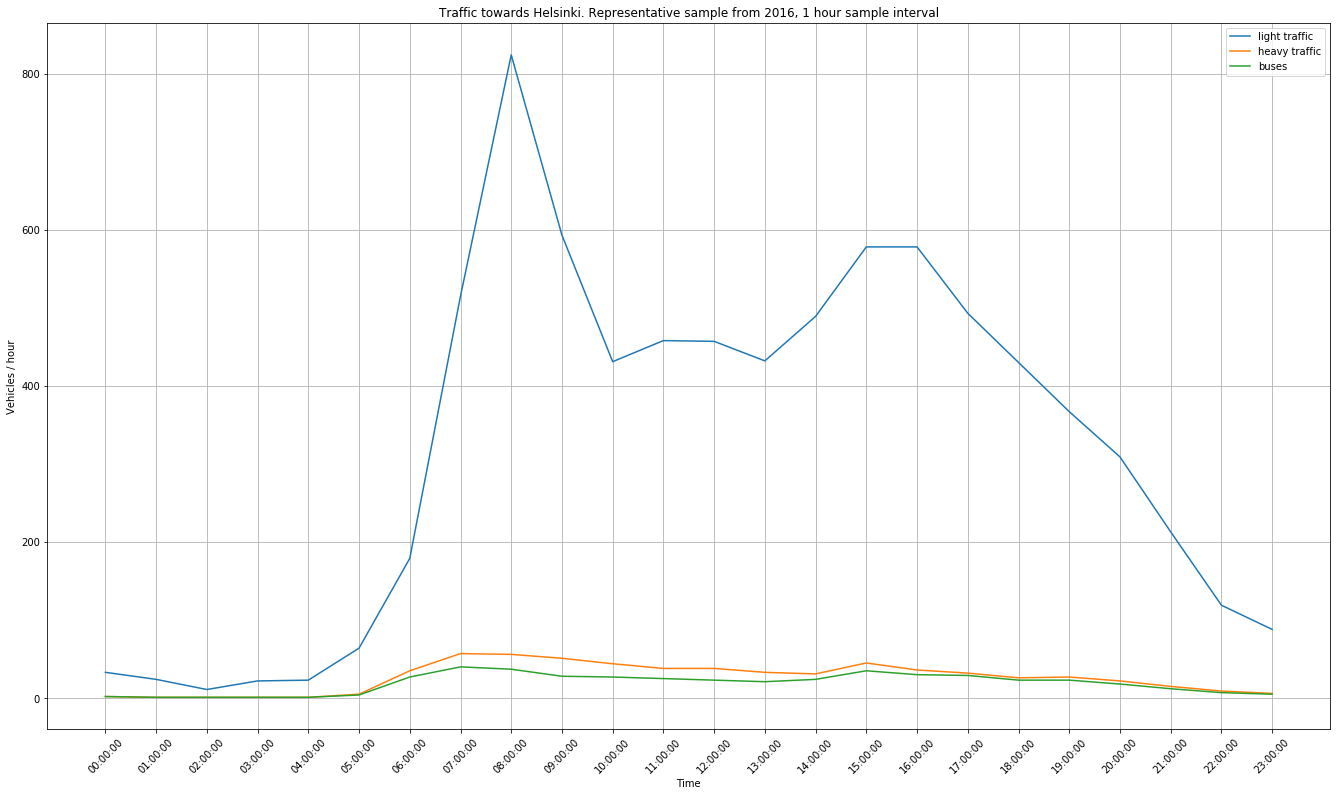

In [16]:
plt.figure(figsize=(23,13))
plt.xticks(xinterval,rotation=45)
plt.grid(True)
plt.title('Traffic towards Helsinki. Representative sample from 2016, 1 hour sample interval')
plt.plot(xinterval,y_2016_tohel['light traffic']);
plt.plot(xinterval,y_2016_tohel['heavy traffic']);
plt.plot(xinterval,y_2016_tohel['buses']);
plt.legend(['light traffic','heavy traffic','buses']);
plt.xlabel('Time');
plt.ylabel('Vehicles / hour');

In [17]:
y_2016_tohel.to_csv('data/dist_larubridge_tohel_16.csv')
y_2016_tolaru.to_csv('data/dist_larubridge_tolaru_16.csv')